<a href="https://colab.research.google.com/github/pawljmlo/dawid-phd/blob/main/primary-topics-download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# depression

In [ ]:
import os
import glob
import re

In [ ]:
files = glob.glob('*.txt')

In [ ]:
my_list = []

for file in files:
  print(file)

  with open(file, 'r') as f:
    lines = f.readlines()

    topic = ""
    number = ""

    topic_old = ""
    number_old = ""
    flag = 0

    for i in range(len(lines)):

      line = lines[i]

      topic_old = topic
      number_old = number

      # matched = re.findall("(?:^|\W)ostatni\spost\sprzez(?:$|\W)", line)
      # if matched:
      #   topic = line.split(' - ostatni post przez')[0]

      if re.findall("Napisany\sprzez(?:$|\W)", line):
        topic = lines[i-1][:-1]

      if line.endswith("odpowiedź\n") or line.endswith("odpowiedzi\n"):
        
        matched = re.findall(r"(\d+)", line)
        if matched:
          number = matched[0]
          flag = 1

      if flag == 1:
        flag = 0
        my_list.append([file, topic, number])


Polecani psychiatrzy.txt
Leki.txt
depresja poporodowa.txt
wyzdrowiałem, zmieniłem swoje życie.txt
Psychoterapia, psychologia.txt
depresja pytania i rozmowy.txt
zabawy.txt
relacje międzyludzkie.txt
wiara.txt
depresja dwubiegunowa.txt
inne zaburzenia borderline, schizofrenia, nerwice.txt
co mnie boli czyli pozostałe choroby.txt
pokój zapoznawczy.txt
rozwój osobisty.txt
metody niekonwencjonalne.txt
swobodnie, rozmownie.txt
depresja informacje zebrane.txt
depresja a sztuka.txt


In [ ]:
matched = re.findall(r"(\d+)", "GORĄCY  3890 odpowiedzi")
print(matched)

['3890']


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(my_list, columns=["group", "topic", "posts"])
df.head()

,group,topic,posts
0,Polecani psychiatrzy.txt,Strony z adresami psychiatrów/ psychologów,29
1,Polecani psychiatrzy.txt,PODPIĘTY 116-123 BEZPŁATNY NR....,20
2,Polecani psychiatrzy.txt,PODPIĘTY Telefon zaufania dla uzależnionych -...,1
3,Polecani psychiatrzy.txt,PODPIĘTY Bezpłatna Poradnia Telefoniczna,7
4,Polecani psychiatrzy.txt,PODPIĘTY Regulamin,0


In [ ]:
df['posts'] = df['posts'].astype('int64')

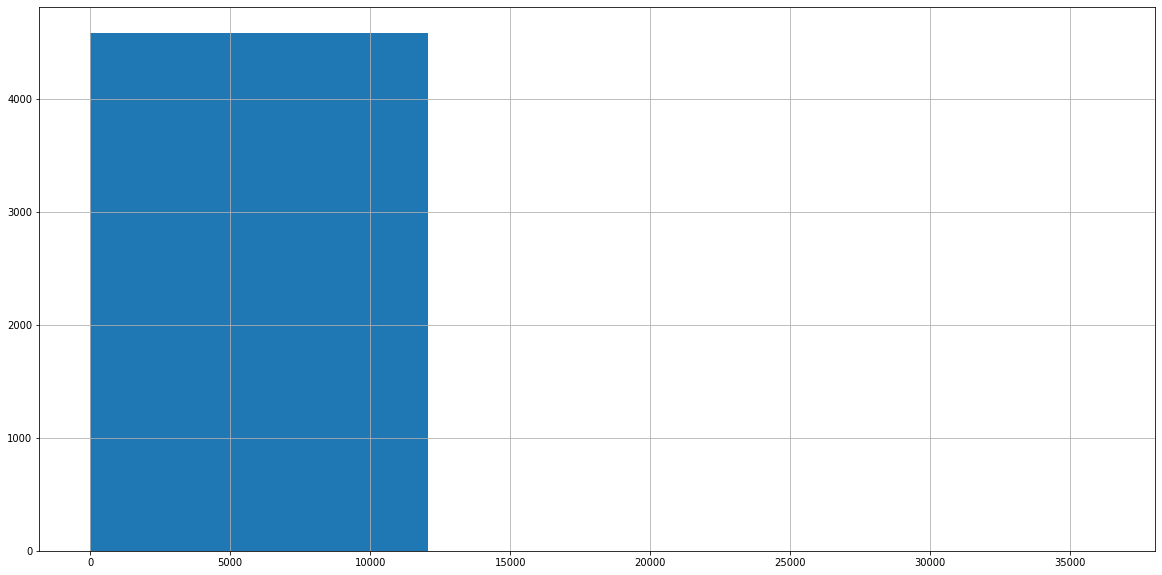

In [ ]:
df['posts'].hist(figsize=(20,10), bins=3)

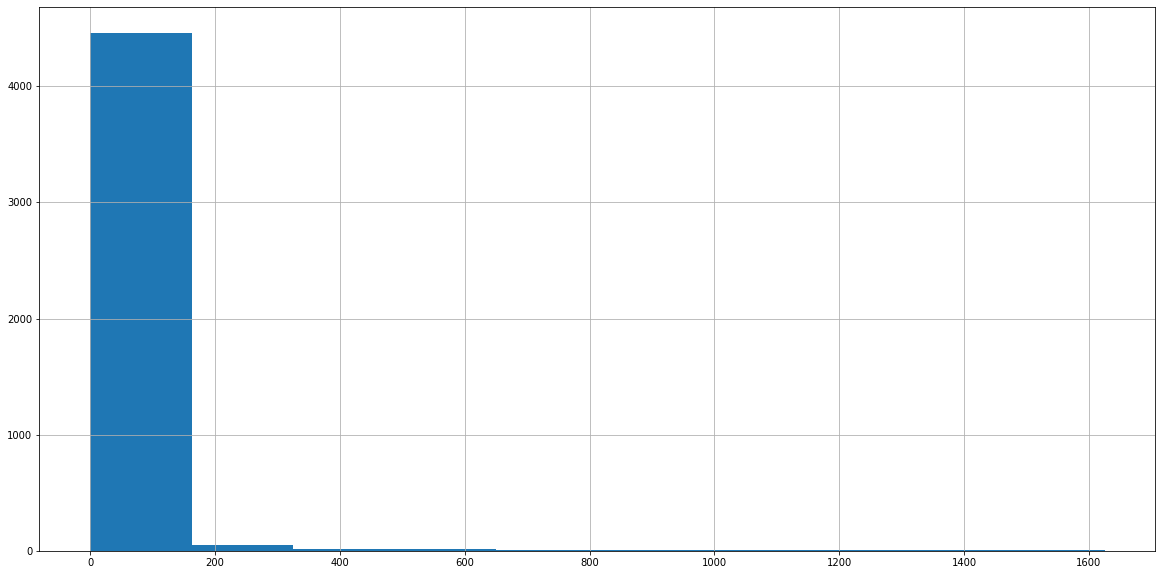

In [ ]:
df[df['posts'] < 2000]['posts'].hist(figsize=(20,10))

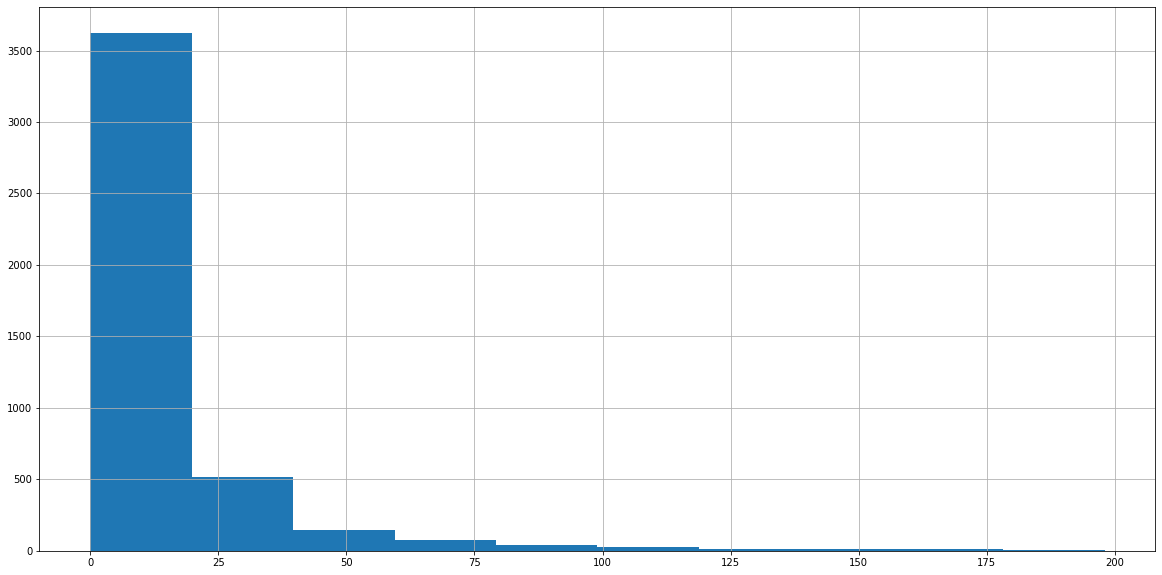

In [ ]:
df[df['posts'] < 200]['posts'].hist(figsize=(20,10))

In [ ]:
df['posts'].describe()

count     4585.000000
mean        58.331298
std        718.096330
min          0.000000
25%          3.000000
50%          7.000000
75%         16.000000
max      36226.000000
Name: posts, dtype: float64

In [ ]:
df[df['posts'] > 4000]

,group,topic,posts
1359,zabawy.txt,zabawa w zadaj pytanie,10827
1360,zabawy.txt,Bez literek ''a'',10190
1363,zabawy.txt,Skojarzenia,36226
1364,zabawy.txt,Dwie ostatnie litery,19083
1365,zabawy.txt,Lepieje,4953
1366,zabawy.txt,TROCHĘ ROZRYWKI - TO CZY TAMTO?,5098
1384,zabawy.txt,inna zabawa w skojarzenia,6164
3847,"swobodnie, rozmownie.txt",Jak się czujesz?,10964
3848,"swobodnie, rozmownie.txt",PODPIĘTY O czym teraz myślisz?,6036
4073,"swobodnie, rozmownie.txt",Dziś pytanie-dziś odpowiedź,6863


In [ ]:
df.groupby('group').sum()

,posts
group,
Leki.txt,981
Polecani psychiatrzy.txt,1249
"Psychoterapia, psychologia.txt",1481
co mnie boli czyli pozostałe choroby.txt,435
depresja a sztuka.txt,22291
depresja dwubiegunowa.txt,581
depresja informacje zebrane.txt,5164
depresja poporodowa.txt,699
depresja pytania i rozmowy.txt,16156


In [ ]:
df[df['group'] == 'wyzdrowiałem, zmieniłem swoje życie.txt']

,group,topic,posts
298,"wyzdrowiałem, zmieniłem swoje życie.txt",Daj przykład co Tobie pomogło a byc może uratu...,75
299,"wyzdrowiałem, zmieniłem swoje życie.txt","""Żegnam się z panem""",7
300,"wyzdrowiałem, zmieniłem swoje życie.txt",Ja też,7
301,"wyzdrowiałem, zmieniłem swoje życie.txt",Byłem tu krótko,5
302,"wyzdrowiałem, zmieniłem swoje życie.txt",A więc tak kochani,16
303,"wyzdrowiałem, zmieniłem swoje życie.txt",The End,2
304,"wyzdrowiałem, zmieniłem swoje życie.txt",Oby.,2
305,"wyzdrowiałem, zmieniłem swoje życie.txt",Depresja już za mną,42
306,"wyzdrowiałem, zmieniłem swoje życie.txt",moje wyjście z chorób oraz rady dla cierpiących,20
307,"wyzdrowiałem, zmieniłem swoje życie.txt",Wygrana z ogonem,4


In [ ]:
df.to_csv('Dawus.csv')

In [ ]:
from google.colab import files
files.download("Dawus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# anxiety

In [ ]:
import os
import glob
import re

In [ ]:
file = "nerwica-lękowa.txt"

my_list = []

with open(file, 'r') as f:
  lines = f.readlines()
  # print(lines)

  topic = ""
  number = ""
  flag = 0

  for i in range(len(lines)):

    line = lines[i]

  #   topic_old = topic
  #   number_old = number

  #   # matched = re.findall("(?:^|\W)ostatni\spost\sprzez(?:$|\W)", line)
  #   # if matched:
  #   #   topic = line.split(' - ostatni post przez')[0]

    if re.findall("Przez(?:$|\W)", line):
      topic = lines[i-1][:-1].split(" 1")[0]

    if topic.startswith("Nerwica Lekowa jest"):
      topic = "Nerwica Lekowa jest 100% wyleczalna"

    if topic.startswith("Problemy nerwicowo"):
      topic = "Problemy nerwicowo/neurologiczne od 10 lat..."

    if topic.startswith("Terapia - mija właśnie"):
      topic = "Terapia - mija właśnie 1,5 roku:)"

    if topic.startswith("Nerwica lękowa - Co zrobić?"):
      topic = "Nerwica lękowa - Co zrobić? Moja historia część 1, zamknięta"
    
    if line.endswith("odpowiedź\n") or line.endswith("odpowiedzi\n"):
      matched = re.findall(r"(\d+)", line)
      if matched:
        number = matched[0]
        flag = 1

    if flag == 1:
      flag = 0
      my_list.append([topic, number])


IndentationError: ignored

In [ ]:
import pandas as pd

df = pd.DataFrame(my_list, columns=["topic", "posts"])
df.head()

,topic,posts
0,Czy to są objawy nerwicy?-WĄTEK ZBIORCZY,3713
1,Fobia społeczna!,3808
2,"Ataki (jak wyglądają, jak sobie radzimy)",17907
3,Zjednoczone Stany Lękowe,245
4,Derealizacja. Depersonalizacja.,5866


In [ ]:
df.head(40)

,topic,posts
0,Czy to są objawy nerwicy?-WĄTEK ZBIORCZY,3713
1,Fobia społeczna!,3808
2,"Ataki (jak wyglądają, jak sobie radzimy)",17907
3,Zjednoczone Stany Lękowe,245
4,Derealizacja. Depersonalizacja.,5866
5,Przełamywanie lęków,221
6,Kilka metod na pokonanie lęku,725
7,Nerwica Lękowa Co zrobić? Moja historia...część 2,5393
8,Nerwica a depresja,460
9,Hipochondria,1


In [ ]:
df.tail()

,topic,posts
4881,cZym My sie tak Martwimy? denerwujemy?o czym m...,24
4882,DIALOG WEWNĘTRZNY I ZEWNĘTRZNY,5
4883,jeśli nie masz jasnego celu co robić...,8
4884,DEZORIENTACJA,5
4885,katatonia. otępinie. patrzę nie widzę. słucham...,1


In [ ]:
df['posts'] = df['posts'].astype('int64')

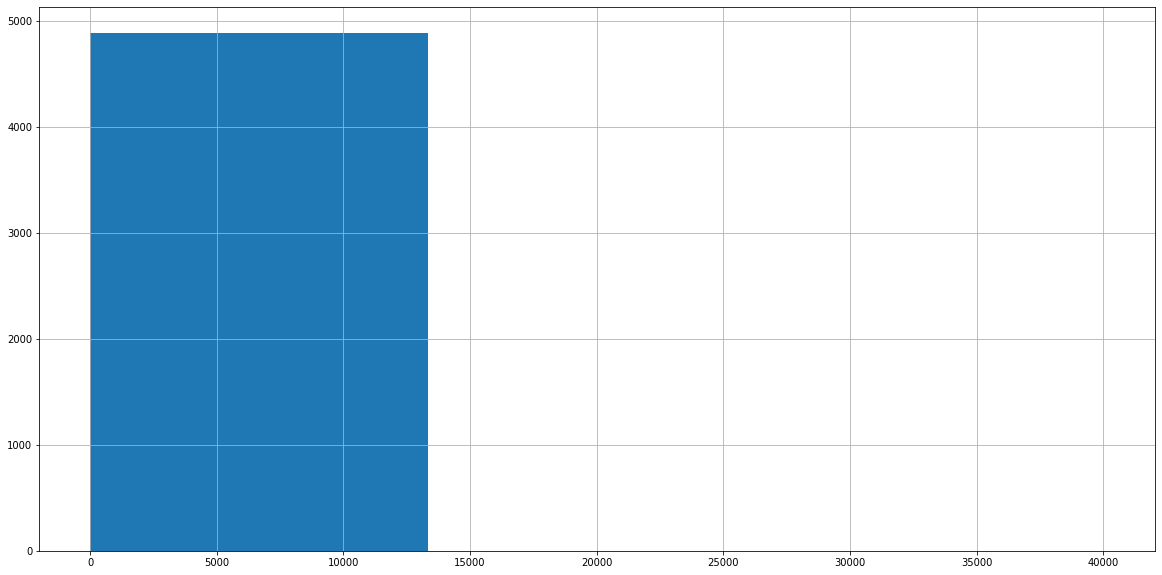

In [ ]:
df['posts'].hist(figsize=(20,10), bins=3)

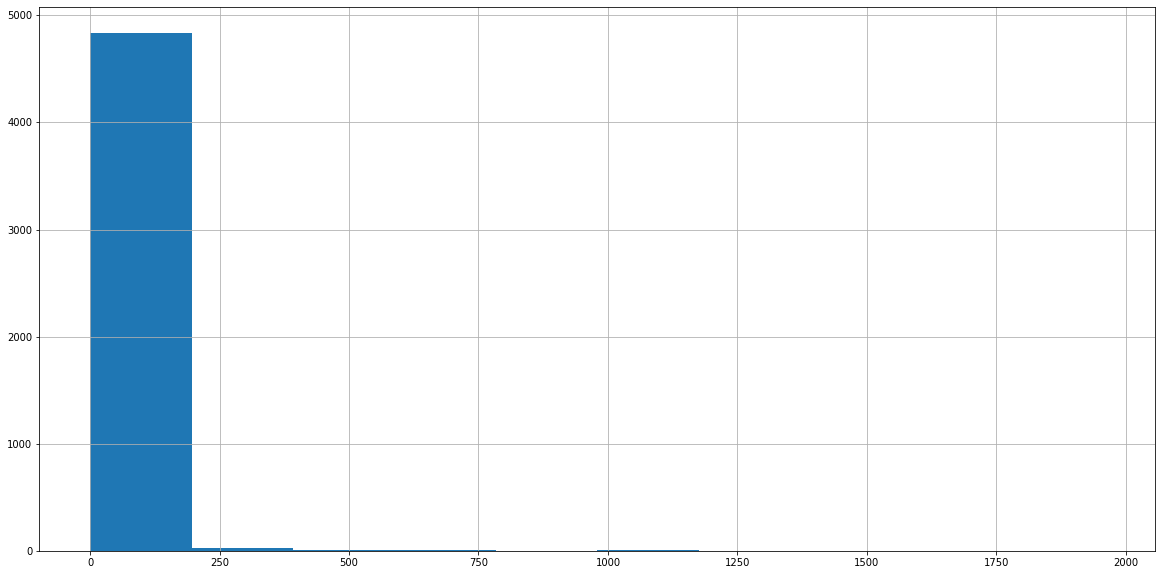

In [ ]:
df[df['posts'] < 2000]['posts'].hist(figsize=(20,10))

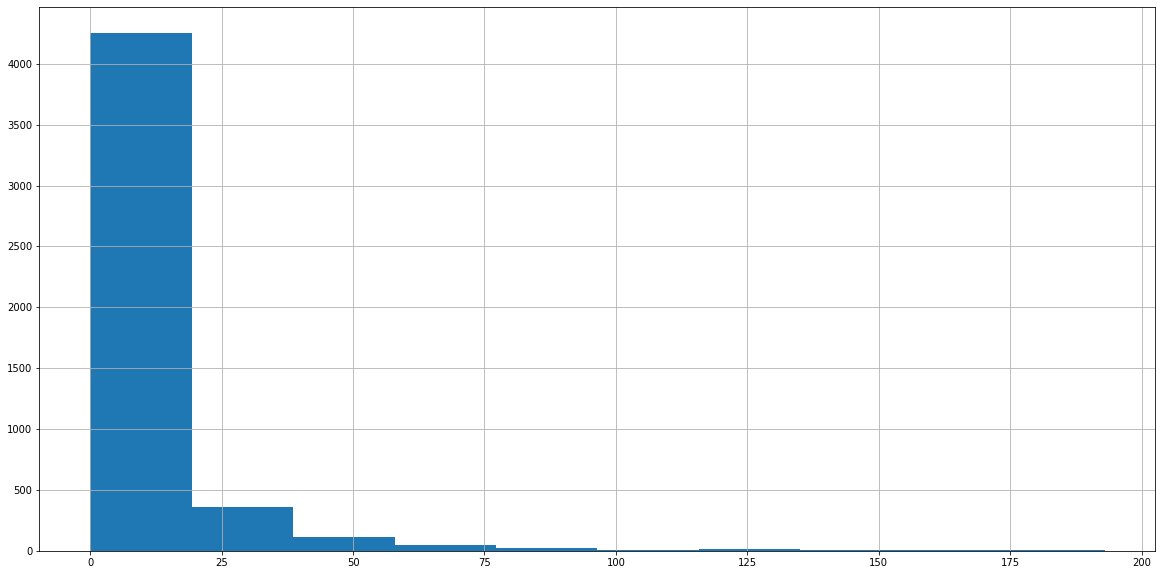

In [ ]:
df[df['posts'] < 200]['posts'].hist(figsize=(20,10))

In [ ]:
df['posts'].describe()

count     4886.000000
mean        33.713672
std        672.350712
min          0.000000
25%          2.000000
50%          4.000000
75%         10.000000
max      40052.000000
Name: posts, dtype: float64

In [ ]:
df.shape

(4886, 2)

In [ ]:
df[df['posts'] > 4000]

,topic,posts
2,"Ataki (jak wyglądają, jak sobie radzimy)",17907
4,Derealizacja. Depersonalizacja.,5866
7,Nerwica Lękowa Co zrobić? Moja historia...część 2,5393
18,Hipochondria - jakie choroby sobie przypisywal...,40052
114,Emetofobia - Lęk przed wymiotowaniem,4567
4840,Nerwica lękowa - Co zrobić? Moja historia częś...,12423


In [ ]:
df.to_csv('Dawus-nerwica.csv')

In [ ]:
from google.colab import files
files.download("Dawus-nerwica.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>